# Jobs Analysis

## Setup

### Run options

In [1]:
run_clustering = True
embed_tasks = True
calculate_lexrank = True


### Installs

In [2]:
%load_ext rpy2.ipython

In [3]:
# Mount data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import sys
sys.path.append("/content/drive/Shareddrives/Working Group - NLP in Engineering Education Research/Fall 2021 Independent Study/Sample code")

In [5]:
!git clone https://github.com/crabcamp/lexrank.git

Cloning into 'lexrank'...
remote: Enumerating objects: 1232, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 1232 (delta 24), reused 49 (delta 21), pack-reused 1172
Receiving objects: 100% (1232/1232), 791.25 KiB | 4.79 MiB/s, done.
Resolving deltas: 100% (429/429), done.


In [6]:
# needed for lexrank
!pip install urlextract

In [7]:
import sys
sys.path.append('/content/lexrank/')

from lexrank.lexrank import degree_centrality_scores

In [8]:
!pip install -U spacy

     |████████████████████████████████| 6.0 MB 3.8 MB/s 
     |████████████████████████████████| 181 kB 59.5 MB/s 
     |████████████████████████████████| 457 kB 61.4 MB/s 
     |████████████████████████████████| 10.1 MB 46.2 MB/s 
     |████████████████████████████████| 653 kB 40.6 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.

In [9]:
!pip install umap-learn
!pip install hdbscan
!pip install -U sentence-transformers

     |████████████████████████████████| 88 kB 1.9 MB/s 
     |████████████████████████████████| 1.1 MB 8.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=05841ad00d14b641e750dabe5352c8361e7afc896c1b707a44ddbb2b7c7a6306
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=a4b17e3dd8978139df5e522cea43b573a9ee963fc1d0ca463753708579fb8f29
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent
     |████████████████████████████████| 5.2 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330833 sha256=8f926f3abf7b5ba91799e5de4806a

In [10]:
!pip install keybert

     |████████████████████████████████| 229 kB 4.3 MB/s 
     |████████████████████████████████| 51 kB 5.8 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=23b832278b811283826bc5310f8577417b43577490bc7f1bac28262d1e4f0e20
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
Successfully built keybert
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
thinc 8.0.15 requires typing-extensions<4.0.0.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.2.0 which is

### Imports

In [11]:
import embed_cluster as ec

sklearn modules imported


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


transformer module imported


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:911: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

In [12]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import umap
#import umap.plot
import hdbscan
import spacy
from spacy.lang.en import English

from sklearn.manifold import MDS, TSNE

from textblob import TextBlob
import nltk
nltk.download('punkt')


import pickle

from keybert import KeyBERT


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
# this is the code to add download the en_core_web_lg language model for spacy
# !python -m spacy download en_core_web_lg
#https://stackoverflow.com/questions/56927602/unable-to-load-the-spacy-model-en-core-web-lg-on-google-colab

# note: need to restart runtime after downloading

### Utility Functions

In [14]:
def select_and_filter(original_df, text_column):
    """
    Parameters
    ----------
    item : str
        Name of the column to filter based on.
    original_df : dataframe
        Original input dataframe with text columns.

    Returns
    -------
    filtered_df : dataframe
        Dataframe that has removed the NAs in the {item} column.
    item_list : list
        List of the text in the {item} column. This list is passed to the transformer model.
    """
    original_df['added_id'] = original_df.index + 1
    filtered_df = original_df.loc[pd.notnull(original_df[text_column])]
    print(f"Filtered dataframe for {text_column}.")
    print(f"Dataframe has size {filtered_df.shape}.")
    
    item_list = filtered_df[text_column].to_list()
    print(f"The list has length {len(item_list)}.")
        
    return filtered_df, item_list

In [15]:
def remove_name(text):
    # nlp = spacy.load("en_core_web_lg")

    doc = nlp(text)
    
    names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    #print(names)  

    if names:
        new_txt = text
        for name in names:
            new_txt = new_txt.replace(name, "")
            #print(new_txt)
        
        return new_txt
    
    else:
        return text

In [16]:
def sentence_segmenter(data_frame, text_column):
    # first, create list from series of text
    
    entry_list = data_frame[text_column].to_list()
    
    # try using dictionary of lists
    
    new_df_dict = {'text_column': [],
                   'job_id': [],
                  #  'original_entry': [],
                   'split_sent': [],
                   'sent_num': []}
    
    # nlp = English()
    # nlp = spacy.load("en_core_web_lg")
    nlp.add_pipe('sentencizer')
    
    ## using the process of converting series to list and then iterating over list
    for i, entry in enumerate(entry_list):
      doc = nlp(entry)
      sentences = [sent.text.strip() for sent in doc.sents]
      if i % 1000 == 0:
        print(f"finished {i} entries.")

      try:  
        for j, sent in enumerate(sentences):
          # print(sent)
          # new_sent = remove_name(sent)
          new_df_dict['text_column'].append(text_column)
          new_df_dict['job_id'].append(data_frame['job_id'].iloc[i])
          # new_df_dict['original_entry'].append(entry)
          new_df_dict['split_sent'].append(sent)
          new_df_dict['sent_num'].append(j)

      except:
        print(f"Entry {i} sentence {j} failed")
          
    sentence_df = pd.DataFrame(new_df_dict)
    
    item_list = sentence_df['split_sent'].to_list()
    
    print(f"text column length {len(new_df_dict['text_column'])}")
    print(f"job id length {len(new_df_dict['job_id'])}")
    print(f"split sent length {len(new_df_dict['split_sent'])}")
    print(f"sent num length {len(new_df_dict['sent_num'])}")


    print(f"Filtered dataframe for {text_column}.")
    print(f"Dataframe has size {sentence_df.shape}.")
    print(f"The list has length {len(item_list)}.")

    
    return sentence_df, item_list
    


### Data Import

In [17]:
os.listdir()
proj_path = "/content/drive/Shareddrives/Project - Engineering Jobs and Non-academic Career Pathways"
os.chdir(proj_path)
os.listdir()

['Jobs analysis - tasks and jobs clustering - eng.ipynb',
 '[OLD] Jobs analysis.ipynb',
 'sustainability_US_20210411.csv',
 'eng_jobs.Rmd',
 'jobs_text.py',
 'bme_top50_skills.png',
 'project engineering jobs.Rproj',
 'sus_jobs.Rmd',
 'sustainability jobs map.png',
 '.Rhistory',
 '.gitignore',
 'paper - engineering jobs.docx',
 'eng_jobs.py',
 '.RData',
 'sustainability_Australia.csv',
 'civil_top50_skills.png',
 'environmental_engineering_Australia.csv',
 'Sustainability in Engineering Job Skills.png',
 'civ_ed_grad_df_20210916.csv',
 'biomedical_us_20210410.csv',
 'sustainability_cortext_20210411.csv',
 'sustainability_us_20210409.csv',
 'sustainability_UK.csv',
 'chem_eng_20210409.csv',
 'mechanical_us_20210411.csv',
 'civ_eng_20210409.csv',
 'environmental_us_20210410.csv',
 'mechanical_engineering_US.csv',
 'sustainability_cortext_20210411.zip',
 'electrical_engineering_US.csv',
 'sustainability jobs',
 '.Rproj.user',
 '.git',
 'Literature',
 'ABET_competencies',
 'abe work',
 'Sk

In [18]:
# jobs_df = jobs_df.rename(columns={'Unnamed: 0': 'job_id'})
# jobs_df

##### Read in Onet Task Data

In [19]:
# task statements from https://www.onetcenter.org/dictionary/26.2/excel/task_statements.html
onet_tasks = pd.read_csv("Task Statements.csv")

In [20]:
onet_tasks

,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source
0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,87.0,07/2014,Incumbent
1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assig...,Core,87.0,07/2014,Incumbent
2,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,Core,87.0,07/2014,Incumbent
3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,87.0,07/2014,Incumbent
4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,87.0,07/2014,Incumbent
...,...,...,...,...,...,...,...,...
19254,53-7121.00,"Tank Car, Truck, and Ship Loaders",12807,Unload cars containing liquids by connecting h...,Supplemental,85.0,08/2019,Incumbent
19255,53-7121.00,"Tank Car, Truck, and Ship Loaders",12804,"Clean interiors of tank cars or tank trucks, u...",Supplemental,85.0,08/2019,Incumbent
19256,53-7121.00,"Tank Car, Truck, and Ship Loaders",12803,Lower gauge rods into tanks or read meters to ...,Supplemental,85.0,08/2019,Incumbent
19257,53-7121.00,"Tank Car, Truck, and Ship Loaders",12805,Operate conveyors and equipment to transfer gr...,Supplemental,85.0,08/2019,Incumbent


In [21]:
onet_tasks.drop_duplicates(subset=['Task'])

,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source
0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,87.0,07/2014,Incumbent
1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assig...,Core,87.0,07/2014,Incumbent
2,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,Core,87.0,07/2014,Incumbent
3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,87.0,07/2014,Incumbent
4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,87.0,07/2014,Incumbent
...,...,...,...,...,...,...,...,...
19254,53-7121.00,"Tank Car, Truck, and Ship Loaders",12807,Unload cars containing liquids by connecting h...,Supplemental,85.0,08/2019,Incumbent
19255,53-7121.00,"Tank Car, Truck, and Ship Loaders",12804,"Clean interiors of tank cars or tank trucks, u...",Supplemental,85.0,08/2019,Incumbent
19256,53-7121.00,"Tank Car, Truck, and Ship Loaders",12803,Lower gauge rods into tanks or read meters to ...,Supplemental,85.0,08/2019,Incumbent
19257,53-7121.00,"Tank Car, Truck, and Ship Loaders",12805,Operate conveyors and equipment to transfer gr...,Supplemental,85.0,08/2019,Incumbent


#### Create engineering flag

In [22]:
onet_tasks['eng_flag'] = onet_tasks['Title'].str.contains('Engineer').astype(int)

##### Join Green Tasks with Tasks df

In [23]:
onet_tasks

,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source,eng_flag
0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,87.0,07/2014,Incumbent,0
1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assig...,Core,87.0,07/2014,Incumbent,0
2,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,Core,87.0,07/2014,Incumbent,0
3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,87.0,07/2014,Incumbent,0
4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,87.0,07/2014,Incumbent,0
...,...,...,...,...,...,...,...,...,...
19254,53-7121.00,"Tank Car, Truck, and Ship Loaders",12807,Unload cars containing liquids by connecting h...,Supplemental,85.0,08/2019,Incumbent,0
19255,53-7121.00,"Tank Car, Truck, and Ship Loaders",12804,"Clean interiors of tank cars or tank trucks, u...",Supplemental,85.0,08/2019,Incumbent,0
19256,53-7121.00,"Tank Car, Truck, and Ship Loaders",12803,Lower gauge rods into tanks or read meters to ...,Supplemental,85.0,08/2019,Incumbent,0
19257,53-7121.00,"Tank Car, Truck, and Ship Loaders",12805,Operate conveyors and equipment to transfer gr...,Supplemental,85.0,08/2019,Incumbent,0


In [24]:
onet_tasks = onet_tasks.drop_duplicates(subset=['Task ID'])

In [25]:
#onet_tasks = pd.merge(onet_tasks, green_tasks, on='Task ID', how='left')


In [26]:
onet_tasks

,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source,eng_flag
0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,87.0,07/2014,Incumbent,0
1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assig...,Core,87.0,07/2014,Incumbent,0
2,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,Core,87.0,07/2014,Incumbent,0
3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,87.0,07/2014,Incumbent,0
4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,87.0,07/2014,Incumbent,0
...,...,...,...,...,...,...,...,...,...
19254,53-7121.00,"Tank Car, Truck, and Ship Loaders",12807,Unload cars containing liquids by connecting h...,Supplemental,85.0,08/2019,Incumbent,0
19255,53-7121.00,"Tank Car, Truck, and Ship Loaders",12804,"Clean interiors of tank cars or tank trucks, u...",Supplemental,85.0,08/2019,Incumbent,0
19256,53-7121.00,"Tank Car, Truck, and Ship Loaders",12803,Lower gauge rods into tanks or read meters to ...,Supplemental,85.0,08/2019,Incumbent,0
19257,53-7121.00,"Tank Car, Truck, and Ship Loaders",12805,Operate conveyors and equipment to transfer gr...,Supplemental,85.0,08/2019,Incumbent,0


In [27]:
#onet_tasks.dropna(subset=['Green Task Type'])

##### Create unique tasks dataframe and list of tasks

In [28]:
unique_tasks_df = onet_tasks.drop_duplicates(subset=['Task'])

In [29]:
unique_tasks_df.reset_index(inplace=True)
unique_tasks_df = unique_tasks_df.rename(columns = {'index':'sent_id'})

In [30]:
unique_tasks_list = unique_tasks_df['Task'].to_list()

In [31]:
print(len(unique_tasks_list))

17976


## Analysis

###### Task embeddings

In [32]:
if embed_tasks:
  task_embeddings = ec.embed_raw_text(unique_tasks_list, 'all-miniLM', max_seq_length=200)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Original model max_seq_length: 128.
New model max_seq_length: 200.
Raw text embedding completed.
Original raw text had dimension: 17976.
The dimension of the embedding is (17976, 384).


In [33]:
# pickle the embeddings
if embed_tasks:
  pickle_out = open(f'onet_tasks_miniLM.pickle', 'wb')
  pickle.dump(task_embeddings, pickle_out)
  pickle_out.close()

In [34]:
pickle_in = open(f'onet_tasks_miniLM.pickle', 'rb')
task_embeddings = pickle.load(pickle_in)
pickle_in.close()

In [35]:
print(task_embeddings.shape)

(17976, 384)


### Dimension Reduction

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


UMAP projection completed. Started with (17976, 100). Returning (17976, 5).
Dimension of umap projection: (17976, 5).


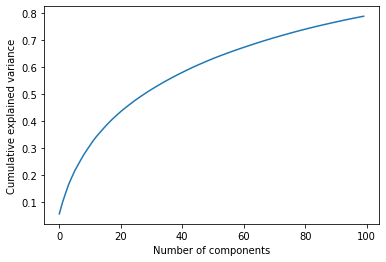

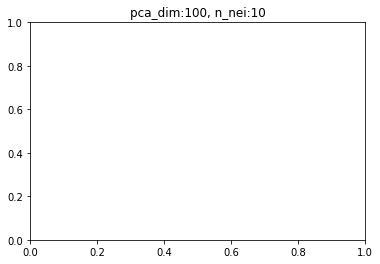

In [36]:
if run_clustering:

  embed_param_dict = embed_param_dict= {'pca_dim': 100,
                    'n_neighbors': 10,
                    'min_dist': 0.0,
                    'n_components': 5,
                    'metric': 'cosine',
                    'random_state': 123}

  embed_param_title = "pca_dim:" + str(embed_param_dict['pca_dim']) + ', n_nei:' + str(embed_param_dict['n_neighbors'])

  lower_embed = ec.project_original_embedding(task_embeddings, 
                                              embed_param_dict, 
                                              to_low = True, 
                                              mid_to_low_method='umap',
                                              title=embed_param_title)


  lower_embed.shape   


### Clustering

You have selected agglomerative for clustering.
Clustering completed.


<Figure size 432x288 with 0 Axes>

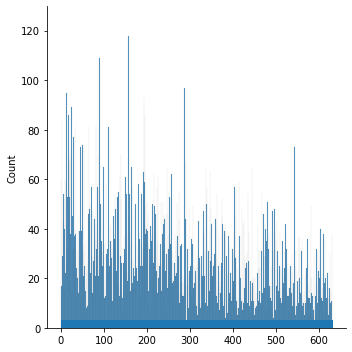

[173 516 396 ... 244 312  67]
The minimum cluster number is: 0.
The length of cluster_model.labels_ is 17976.
The length of the original corpus list is 17976.
Cluster  0
Cluster size: 60
['Book tickets for guests for local tours and attractions.', 'Provide advice on transportation options, types of carriers, or shipping routes.', 'Coordinate services for events, such as accommodation and transportation for participants, facilities, catering, signage, displays, special needs requirements, printing and event security.', 'Conduct field trips to point out scientific, historic, and natural features of parks, forests, historic sites, or other attractions.', 'Prepare and present illustrated lectures and interpretive talks about park features.', 'Plan and organize public events at the park.', 'Provide visitor services, such as explaining regulations, answering visitor requests, needs and complaints, and providing information about the park and surrounding areas.', 'Assist with operations of ge

In [37]:
if run_clustering:

  # print("Currently clustering item:", item)
  ## For hdbscan: specify min_cluster_size, min_samples, alpha
  ## for agglomerative specify: n_clusters, linkage
  ## for kmeans specify: num_clusters
  cluster_param_dict = {'min_cluster_size': 4, # hdbscan options
                        'min_samples': 1,
                        'cluster_selection_epsilon': 0.1,
                        'alpha': 1.0,
                        'metric': 'euclidean',
                        'agg_type': "threshold", # agglomerative options - can be "threshold"or "n_cluster"
                        'n_clusters': 60,
                        'threshold_val': 1.25,
                        'affinity': 'euclidean',
                        'linkage': 'ward',
                        'num_clusters': 30}

  # version to use the lower-dimensional embedding for the clustering     
  cluster_res = ec.cluster_embedding(data=lower_embed, original_corpus_list=unique_tasks_list, 
                    model='agglomerative', param_dict=cluster_param_dict, plot_option=True)




  all_cluster_labels = cluster_res.labels_


  #ai_sentence_df['cluster_label'] = all_cluster_labels

  # if using a subset of the data
  unique_tasks_df['task_cluster_label'] = all_cluster_labels

  unique_tasks_df.shape
  unique_tasks_df.columns

In [38]:
print(unique_tasks_df.columns)
print(unique_tasks_df.shape)

Index(['sent_id', 'O*NET-SOC Code', 'Title', 'Task ID', 'Task', 'Task Type',
       'Incumbents Responding', 'Date', 'Domain Source', 'eng_flag',
       'task_cluster_label'],
      dtype='object')
(17976, 11)


In [39]:
unique_tasks_df

,sent_id,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source,eng_flag,task_cluster_label
0,0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,87.0,07/2014,Incumbent,0,173
1,1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assig...,Core,87.0,07/2014,Incumbent,0,516
2,2,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,Core,87.0,07/2014,Incumbent,0,396
3,3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,87.0,07/2014,Incumbent,0,173
4,4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,87.0,07/2014,Incumbent,0,380
...,...,...,...,...,...,...,...,...,...,...,...
17971,19254,53-7121.00,"Tank Car, Truck, and Ship Loaders",12807,Unload cars containing liquids by connecting h...,Supplemental,85.0,08/2019,Incumbent,0,241
17972,19255,53-7121.00,"Tank Car, Truck, and Ship Loaders",12804,"Clean interiors of tank cars or tank trucks, u...",Supplemental,85.0,08/2019,Incumbent,0,334
17973,19256,53-7121.00,"Tank Car, Truck, and Ship Loaders",12803,Lower gauge rods into tanks or read meters to ...,Supplemental,85.0,08/2019,Incumbent,0,244
17974,19257,53-7121.00,"Tank Car, Truck, and Ship Loaders",12805,Operate conveyors and equipment to transfer gr...,Supplemental,85.0,08/2019,Incumbent,0,312


In [40]:
if run_clustering:
  unique_tasks_df.to_csv("onet_tasks_clustered.csv", index=False)

Add in the green task labeling

In [41]:
# green_task_labels = green_tasks[['Task ID', 'Green Task Type']]

In [42]:
# joined_df = pd.merge(unique_tasks_df, green_task_labels, on='Task ID', how = 'left')

In [43]:
# joined_df.to_csv('one_tasks_w_green_clustered_v2.csv', index=False)

In [44]:
# unique_tasks_df = pd.read_csv("one_tasks_w_green_clustered_v2.csv")

In [45]:
unique_tasks_df

,sent_id,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source,eng_flag,task_cluster_label
0,0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,87.0,07/2014,Incumbent,0,173
1,1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assig...,Core,87.0,07/2014,Incumbent,0,516
2,2,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,Core,87.0,07/2014,Incumbent,0,396
3,3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,87.0,07/2014,Incumbent,0,173
4,4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,87.0,07/2014,Incumbent,0,380
...,...,...,...,...,...,...,...,...,...,...,...
17971,19254,53-7121.00,"Tank Car, Truck, and Ship Loaders",12807,Unload cars containing liquids by connecting h...,Supplemental,85.0,08/2019,Incumbent,0,241
17972,19255,53-7121.00,"Tank Car, Truck, and Ship Loaders",12804,"Clean interiors of tank cars or tank trucks, u...",Supplemental,85.0,08/2019,Incumbent,0,334
17973,19256,53-7121.00,"Tank Car, Truck, and Ship Loaders",12803,Lower gauge rods into tanks or read meters to ...,Supplemental,85.0,08/2019,Incumbent,0,244
17974,19257,53-7121.00,"Tank Car, Truck, and Ship Loaders",12805,Operate conveyors and equipment to transfer gr...,Supplemental,85.0,08/2019,Incumbent,0,312


In [46]:
unique_tasks_df[unique_tasks_df['Title'].str.contains("Engineer")]

,sent_id,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source,eng_flag,task_cluster_label
711,726,11-9041.00,Architectural and Engineering Managers,20170,Manage the coordination and overall integratio...,Core,59.0,08/2020,Incumbent,1,118
712,727,11-9041.00,Architectural and Engineering Managers,20171,"Direct, review, or approve project design chan...",Core,60.0,08/2020,Incumbent,1,319
713,728,11-9041.00,Architectural and Engineering Managers,1071,Consult or negotiate with clients to prepare p...,Core,59.0,08/2020,Incumbent,1,204
714,729,11-9041.00,Architectural and Engineering Managers,20172,"Prepare budgets, bids, or contracts.",Core,59.0,08/2020,Incumbent,1,406
715,730,11-9041.00,Architectural and Engineering Managers,1070,"Present and explain proposals, reports, or fin...",Core,60.0,08/2020,Incumbent,1,204
...,...,...,...,...,...,...,...,...,...,...,...
17551,18833,53-5031.00,Ship Engineers,14562,Operate or maintain off-loading liquid pumps o...,Core,80.0,07/2016,Incumbent,1,357
17552,18834,53-5031.00,Ship Engineers,14564,Supervise marine engine technicians engaged in...,Core,80.0,07/2016,Incumbent,1,534
17553,18835,53-5031.00,Ship Engineers,14565,"Order and receive engine room stores, such as ...",Core,80.0,07/2016,Incumbent,1,85
17554,18836,53-5031.00,Ship Engineers,14568,"Fabricate engine replacement parts, such as va...",Supplemental,80.0,07/2016,Incumbent,1,121


In [47]:
#joined_df.rename(columns={'Green Task Type_x': 'Green Task Type'}).drop(columns=['Green Task Type_y']).to_csv("one_tasks_w_green_clustered_v2.csv", index=False)

#### Lexrank Summarization

In [48]:
import nltk
from sentence_transformers import SentenceTransformer, util
import numpy as np
from lexrank import LexRank
from lexrank.lexrank import degree_centrality_scores
import math

In [49]:
np.sort(unique_tasks_df.task_cluster_label.unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [50]:
if calculate_lexrank:
  lexrank_summary_dict = {'task_id':[],
                        'task_cluster_label': [],
                        'Task': []}


  bad_clusters = []

  # model = SentenceTransformer('paraphrase-mpnet-base-v2')
  model = SentenceTransformer('all-MiniLM-L12-v2')


  for i in np.sort(unique_tasks_df['task_cluster_label'].unique()):
      try:
        print(f"\nWorking on cluster {i}")
        temp_cl_df = unique_tasks_df[unique_tasks_df['task_cluster_label'] == i]
        
        # decided not to use previously calculated embeddings because they would need to be converted to tensor
        # test_embed = test_df.loc[:,'0':'74']
        
        
        sentences = temp_cl_df['Task'].to_list()
        

        embeddings = model.encode(sentences, convert_to_tensor=True)
        # embeddings = test_embed
        
        print(f"Finished embedding for cluster {i}.")
        
        
        #Compute the pair-wise cosine similarities
        cos_scores = util.pytorch_cos_sim(embeddings, embeddings).numpy()
        
        print(f"Calculated cosine similarities for cluster {i}.")
        #Compute the centrality for each sentence
        centrality_scores = degree_centrality_scores(cos_scores, threshold=None)
        
        print(f"Completed centrality scores for cluster {i}.")
        #We argsort so that the first element is the sentence with the highest score
        most_central_sentence_indices = np.argsort(-centrality_scores)
        cl_sent_num = len(sentences)
        sum_sent_cap = int(math.ceil(cl_sent_num * 0.2))
        
        #Print the top 20% of sentences with the highest scores
        print(f"Summary for cluster {i}: ")
        for idx in most_central_sentence_indices[0:sum_sent_cap]:
            print(sentences[idx].strip())
            
            lexrank_summary_dict['task_id'].append(temp_cl_df['Task ID'].iloc[idx])
            lexrank_summary_dict['task_cluster_label'].append(i)
            lexrank_summary_dict['Task'].append(sentences[idx].strip())
      except:
        bad_clusters.append(i)


Streaming output truncated to the last 5000 lines.
Compute taxes owed and prepare tax returns, ensuring compliance with payment, reporting, or other tax requirements.
Process individual and corporate income tax returns, and sales and excise tax returns.
Prepare and file annual tax returns or prepare financial information so that outside accountants can complete tax returns.
Review financial records, such as income statements and documentation of expenditures to determine forms needed to prepare tax returns.
Compute taxes owed or overpaid, using adding machines or personal computers, and complete entries on forms, following tax form instructions and tax tables.
Answer questions from taxpayers and assist them in completing tax forms.
Enter tax return information into computers for processing.

Working on cluster 192
Finished embedding for cluster 192.
Calculated cosine similarities for cluster 192.
Completed centrality scores for cluster 192.
Summary for cluster 192: 
Gather information 

In [51]:
if calculate_lexrank:
  lexrank_summary_df = pd.DataFrame(lexrank_summary_dict)

In [52]:
if calculate_lexrank:
  lexrank_summary_df

In [53]:
# if calculate_lexrank:
  # len(lexrank_summary_df.sent_id.unique())

In [54]:
if calculate_lexrank:
  lexrank_summary_df.to_csv(f"onet_tasks_lexrank_summary.csv", index = False)

In [55]:
lexrank_summary_df = pd.read_csv("onet_tasks_lexrank_summary.csv")

### Analysis of Job Clusters

In [56]:
unique_tasks_df = pd.read_csv("onet_tasks_clustered.csv")
# unique_tasks_df = pd.read_csv("onet_tasks_w_green_clustered.csv")

In [57]:
unique_tasks_df.Title.nunique()

923

In [58]:
unique_tasks_df.Title.unique()

array(['Chief Executives', 'Chief Sustainability Officers',
       'General and Operations Managers', 'Legislators',
       'Advertising and Promotions Managers', 'Marketing Managers',
       'Sales Managers', 'Public Relations Managers',
       'Fundraising Managers', 'Administrative Services Managers',
       'Facilities Managers', 'Security Managers',
       'Computer and Information Systems Managers', 'Financial Managers',
       'Treasurers and Controllers', 'Investment Fund Managers',
       'Industrial Production Managers',
       'Quality Control Systems Managers',
       'Geothermal Production Managers', 'Biofuels Production Managers',
       'Biomass Power Plant Managers',
       'Hydroelectric Production Managers', 'Purchasing Managers',
       'Transportation, Storage, and Distribution Managers',
       'Supply Chain Managers', 'Compensation and Benefits Managers',
       'Human Resources Managers', 'Training and Development Managers',
       'Farmers, Ranchers, and Other A

In [59]:
job_list = unique_tasks_df.Title.unique()
print(len(job_list))

engineer_list = [job for job in job_list if 'Engineer' in job]

923


In [60]:
print(len(engineer_list))

56


In [61]:
engineer_list

['Architectural and Engineering Managers',
 'Logistics Engineers',
 'Telecommunications Engineering Specialists',
 'Information Security Engineers',
 'Blockchain Engineers',
 'Computer Systems Engineers/Architects',
 'Aerospace Engineers',
 'Agricultural Engineers',
 'Bioengineers and Biomedical Engineers',
 'Chemical Engineers',
 'Civil Engineers',
 'Transportation Engineers',
 'Water/Wastewater Engineers',
 'Computer Hardware Engineers',
 'Electrical Engineers',
 'Electronics Engineers, Except Computer',
 'Environmental Engineers',
 'Health and Safety Engineers, Except Mining Safety Engineers and Inspectors',
 'Fire-Prevention and Protection Engineers',
 'Industrial Engineers',
 'Human Factors Engineers and Ergonomists',
 'Validation Engineers',
 'Manufacturing Engineers',
 'Marine Engineers and Naval Architects',
 'Materials Engineers',
 'Mechanical Engineers',
 'Fuel Cell Engineers',
 'Automotive Engineers',
 'Mining and Geological Engineers, Including Mining Safety Engineers',
 'N

In [62]:
job_task_clusters = unique_tasks_df.groupby('Title')['task_cluster_label'].apply(list)
job_task_clusters

Title
Accountants and Auditors                                              [386, 283, 135, 613, 330, 507, 283, 81, 137, 5...
Actors                                                                [392, 555, 123, 555, 555, 123, 29, 29, 123, 55...
Actuaries                                                             [388, 73, 481, 582, 401, 401, 131, 204, 131, 2...
Acupuncturists                                                        [476, 420, 158, 198, 196, 158, 338, 140, 99, 2...
Acute Care Nurses                                                     [163, 22, 196, 338, 102, 338, 338, 630, 45, 99...
                                                                                            ...                        
Wind Turbine Service Technicians                                      [4, 426, 426, 233, 307, 426, 85, 451, 426, 426...
Woodworking Machine Setters, Operators, and Tenders, Except Sawing    [359, 152, 479, 492, 589, 445, 245, 214, 286, ...
Word Processors and Typists       

In [63]:
job_task_clusters = unique_tasks_df.groupby('Title').agg({'task_cluster_label':list}).reset_index()
print(job_task_clusters.columns)
job_task_clusters

Index(['Title', 'task_cluster_label'], dtype='object')


,Title,task_cluster_label
0,Accountants and Auditors,"[386, 283, 135, 613, 330, 507, 283, 81, 137, 5..."
1,Actors,"[392, 555, 123, 555, 555, 123, 29, 29, 123, 55..."
2,Actuaries,"[388, 73, 481, 582, 401, 401, 131, 204, 131, 2..."
3,Acupuncturists,"[476, 420, 158, 198, 196, 158, 338, 140, 99, 2..."
4,Acute Care Nurses,"[163, 22, 196, 338, 102, 338, 338, 630, 45, 99..."
...,...,...
918,Wind Turbine Service Technicians,"[4, 426, 426, 233, 307, 426, 85, 451, 426, 426..."
919,"Woodworking Machine Setters, Operators, and Te...","[359, 152, 479, 492, 589, 445, 245, 214, 286, ..."
920,Word Processors and Typists,"[23, 154, 311, 199, 274, 407, 46, 199, 399, 5,..."
921,Writers and Authors,"[90, 572, 437, 90, 166, 303, 90, 303, 392, 94,..."


In [64]:
job_task_clusters['str_clusters'] = job_task_clusters['task_cluster_label'].apply(lambda x: ', '.join(map(str, x)))

In [65]:
job_task_clusters.str_clusters

0      386, 283, 135, 613, 330, 507, 283, 81, 137, 55...
1      392, 555, 123, 555, 555, 123, 29, 29, 123, 555...
2      388, 73, 481, 582, 401, 401, 131, 204, 131, 29...
3      476, 420, 158, 198, 196, 158, 338, 140, 99, 22...
4      163, 22, 196, 338, 102, 338, 338, 630, 45, 99,...
                             ...                        
918    4, 426, 426, 233, 307, 426, 85, 451, 426, 426,...
919    359, 152, 479, 492, 589, 445, 245, 214, 286, 1...
920    23, 154, 311, 199, 274, 407, 46, 199, 399, 5, ...
921    90, 572, 437, 90, 166, 303, 90, 303, 392, 94, ...
922    528, 466, 255, 89, 497, 497, 497, 497, 497, 49...
Name: str_clusters, Length: 923, dtype: object

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
vectorizer = CountVectorizer(token_pattern = r"[0-9]+")

X = vectorizer.fit_transform(job_task_clusters.str_clusters)

In [68]:
X.shape

(923, 631)

In [69]:
vectorizer.get_feature_names()

['0',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '2',
 '20',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '21',
 '210',
 '211',
 '

In [70]:
count_vect_df = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
count_vect_df

,0,1,10,100,101,102,103,104,105,106,...,90,91,92,93,94,95,96,97,98,99
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
921,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,1,0,0,0,0,0


In [71]:
count_vect_df.columns

Index(['0', '1', '10', '100', '101', '102', '103', '104', '105', '106',
       ...
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99'],
      dtype='object', length=631)

#### Creating job cluster greenness scores

In [72]:
unique_tasks_df

,sent_id,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source,eng_flag,task_cluster_label
0,0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,87.0,07/2014,Incumbent,0,173
1,1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assig...,Core,87.0,07/2014,Incumbent,0,516
2,2,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,Core,87.0,07/2014,Incumbent,0,396
3,3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,87.0,07/2014,Incumbent,0,173
4,4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,87.0,07/2014,Incumbent,0,380
...,...,...,...,...,...,...,...,...,...,...,...
17971,19254,53-7121.00,"Tank Car, Truck, and Ship Loaders",12807,Unload cars containing liquids by connecting h...,Supplemental,85.0,08/2019,Incumbent,0,241
17972,19255,53-7121.00,"Tank Car, Truck, and Ship Loaders",12804,"Clean interiors of tank cars or tank trucks, u...",Supplemental,85.0,08/2019,Incumbent,0,334
17973,19256,53-7121.00,"Tank Car, Truck, and Ship Loaders",12803,Lower gauge rods into tanks or read meters to ...,Supplemental,85.0,08/2019,Incumbent,0,244
17974,19257,53-7121.00,"Tank Car, Truck, and Ship Loaders",12805,Operate conveyors and equipment to transfer gr...,Supplemental,85.0,08/2019,Incumbent,0,312


### Cluster Summarization

In [73]:
# unique_tasks_df['green_task_flag'] = unique_tasks_df['Green Task Type'].notnull().astype(int)

In [74]:
unique_tasks_df

,sent_id,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source,eng_flag,task_cluster_label
0,0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,87.0,07/2014,Incumbent,0,173
1,1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assig...,Core,87.0,07/2014,Incumbent,0,516
2,2,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,Core,87.0,07/2014,Incumbent,0,396
3,3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,87.0,07/2014,Incumbent,0,173
4,4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,87.0,07/2014,Incumbent,0,380
...,...,...,...,...,...,...,...,...,...,...,...
17971,19254,53-7121.00,"Tank Car, Truck, and Ship Loaders",12807,Unload cars containing liquids by connecting h...,Supplemental,85.0,08/2019,Incumbent,0,241
17972,19255,53-7121.00,"Tank Car, Truck, and Ship Loaders",12804,"Clean interiors of tank cars or tank trucks, u...",Supplemental,85.0,08/2019,Incumbent,0,334
17973,19256,53-7121.00,"Tank Car, Truck, and Ship Loaders",12803,Lower gauge rods into tanks or read meters to ...,Supplemental,85.0,08/2019,Incumbent,0,244
17974,19257,53-7121.00,"Tank Car, Truck, and Ship Loaders",12805,Operate conveyors and equipment to transfer gr...,Supplemental,85.0,08/2019,Incumbent,0,312


In [75]:
cluster_label_flag_sums = unique_tasks_df.groupby('task_cluster_label')['eng_flag'].sum().reset_index()
cluster_label_flag_sums = cluster_label_flag_sums.rename(columns={'eng_flag':'eng_flag_sum'})
cluster_label_flag_sums

,task_cluster_label,eng_flag_sum
0,0,0
1,1,4
2,2,19
3,3,0
4,4,4
...,...,...
626,626,7
627,627,0
628,628,0
629,629,0


In [76]:
cluster_label_task_counts = unique_tasks_df.groupby('task_cluster_label').size().reset_index(name='task_cluster_n')
cluster_label_task_counts

,task_cluster_label,task_cluster_n
0,0,60
1,1,17
2,2,84
3,3,14
4,4,29
...,...,...
626,626,30
627,627,10
628,628,14
629,629,11


In [77]:
cluster_label_sums_normed = cluster_label_flag_sums['eng_flag_sum'].divide(cluster_label_task_counts['task_cluster_n'])
cluster_label_sums_normed

0      0.000000
1      0.235294
2      0.226190
3      0.000000
4      0.137931
         ...   
626    0.233333
627    0.000000
628    0.000000
629    0.000000
630    0.000000
Length: 631, dtype: float64

In [78]:
cluster_label_sums_normed = cluster_label_sums_normed.reindex(count_vect_df.columns.astype(int))
cluster_label_sums_normed

0      0.000000
1      0.235294
10     0.000000
100    0.058824
101    0.083333
         ...   
95     0.032258
96     0.000000
97     0.040000
98     0.000000
99     0.000000
Length: 631, dtype: float64

reindex the flag sums df

In [79]:
#count_vect_df.columns.astype(int)
cluster_label_flag_sums = cluster_label_flag_sums.reindex(count_vect_df.columns.astype(int))
cluster_label_flag_sums

,task_cluster_label,eng_flag_sum
0,0,0
1,1,4
10,10,0
100,100,2
101,101,1
...,...,...
95,95,1
96,96,0
97,97,1
98,98,0


In [80]:
count_vect_df

,0,1,10,100,101,102,103,104,105,106,...,90,91,92,93,94,95,96,97,98,99
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
921,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,1,0,0,0,0,0


multiply the two

In [81]:
#job_green_flag_sums = count_vect_df.dot(cluster_label_flag_sums['green_task_flag_sum'].to_numpy())
job_eng_flag_normed_sums = count_vect_df.dot(cluster_label_sums_normed.to_numpy())
job_eng_flag_normed_sums

0      0.424410
1      0.372351
2      1.128509
3      0.286519
4      0.325730
         ...   
918    3.206942
919    0.557646
920    0.191481
921    0.671681
922    0.032258
Length: 923, dtype: float64

In [82]:
job_eng_flag_sums = count_vect_df.dot(cluster_label_flag_sums['eng_flag_sum'].to_numpy())
job_eng_flag_sums

0       20
1       13
2       23
3       18
4       19
      ... 
918    133
919     16
920      8
921     26
922      1
Length: 923, dtype: int64

In [83]:
job_eng_flag_sums.argsort()[-6:]

917    278
918    279
919    585
920    559
921    905
922    375
dtype: int64

In [84]:
job_eng_flag_normed_sums.argsort()[-6:]

917    905
918    665
919     62
920    585
921    375
922    559
dtype: int64

In [85]:
job_task_clusters.iloc[[665]]

,Title,task_cluster_label,str_clusters
665,Photonics Engineers,"[581, 433, 433, 433, 433, 164, 433, 433, 433, ...","581, 433, 433, 433, 433, 164, 433, 433, 433, 4..."


In [86]:
job_task_clusters['job_eng_flag_sums'] = job_eng_flag_sums
job_task_clusters['job_eng_flag_normed_sums'] = job_eng_flag_normed_sums

In [87]:
job_task_clusters

,Title,task_cluster_label,str_clusters,job_eng_flag_sums,job_eng_flag_normed_sums
0,Accountants and Auditors,"[386, 283, 135, 613, 330, 507, 283, 81, 137, 5...","386, 283, 135, 613, 330, 507, 283, 81, 137, 55...",20,0.424410
1,Actors,"[392, 555, 123, 555, 555, 123, 29, 29, 123, 55...","392, 555, 123, 555, 555, 123, 29, 29, 123, 555...",13,0.372351
2,Actuaries,"[388, 73, 481, 582, 401, 401, 131, 204, 131, 2...","388, 73, 481, 582, 401, 401, 131, 204, 131, 29...",23,1.128509
3,Acupuncturists,"[476, 420, 158, 198, 196, 158, 338, 140, 99, 2...","476, 420, 158, 198, 196, 158, 338, 140, 99, 22...",18,0.286519
4,Acute Care Nurses,"[163, 22, 196, 338, 102, 338, 338, 630, 45, 99...","163, 22, 196, 338, 102, 338, 338, 630, 45, 99,...",19,0.325730
...,...,...,...,...,...
918,Wind Turbine Service Technicians,"[4, 426, 426, 233, 307, 426, 85, 451, 426, 426...","4, 426, 426, 233, 307, 426, 85, 451, 426, 426,...",133,3.206942
919,"Woodworking Machine Setters, Operators, and Te...","[359, 152, 479, 492, 589, 445, 245, 214, 286, ...","359, 152, 479, 492, 589, 445, 245, 214, 286, 1...",16,0.557646
920,Word Processors and Typists,"[23, 154, 311, 199, 274, 407, 46, 199, 399, 5,...","23, 154, 311, 199, 274, 407, 46, 199, 399, 5, ...",8,0.191481
921,Writers and Authors,"[90, 572, 437, 90, 166, 303, 90, 303, 392, 94,...","90, 572, 437, 90, 166, 303, 90, 303, 392, 94, ...",26,0.671681


In [88]:
job_task_clusters.to_csv("job_task_clusters_with_eng_sums.csv", index=False)

In [89]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse



In [90]:
similarities = cosine_similarity(count_vect_df)

In [91]:
similarities

array([[1.        , 0.        , 0.22700174, ..., 0.05572782, 0.06255432,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.1227144 ,
        0.        ],
       [0.22700174, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05572782, 0.        , 0.        , ..., 1.        , 0.08017837,
        0.        ],
       [0.06255432, 0.1227144 , 0.        , ..., 0.08017837, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [92]:
from scipy.cluster import  hierarchy


In [93]:
X.dtype

dtype('int64')

In [94]:
#Clustering
X = X.todense()
threshold = 0.95
Z = hierarchy.linkage(X,"average", metric="cosine")
C = hierarchy.fcluster(Z, threshold, criterion="distance")

In [95]:
Z.shape

(922, 4)

In [96]:
np.unique(C)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int32)

In [97]:
job_task_clusters['job_cluster'] = C

In [98]:
job_task_clusters.sort_values(by=['job_cluster'])

,Title,task_cluster_label,str_clusters,job_eng_flag_sums,job_eng_flag_normed_sums,job_cluster
379,Funeral Home Managers,"[287, 287, 287, 287, 287, 287, 287, 332, 287, ...","287, 287, 287, 287, 287, 287, 287, 332, 287, 2...",4,0.215564,1
273,Embalmers,"[287, 287, 58, 324, 45, 287, 287, 324, 287, 28...","287, 287, 58, 324, 45, 287, 287, 324, 287, 287...",0,0.000000,1
203,Crematory Operators,"[287, 199, 287, 287, 287, 17, 287, 324, 287, 2...","287, 199, 287, 287, 287, 17, 287, 324, 287, 28...",0,0.000000,1
189,Coroners,"[163, 287, 287, 196, 287, 236, 287, 287, 349, ...","163, 287, 287, 196, 287, 236, 287, 287, 349, 1...",5,0.067345,1
573,"Morticians, Undertakers, and Funeral Arrangers","[287, 287, 287, 287, 287, 142, 287, 257, 287, ...","287, 287, 287, 287, 287, 142, 287, 257, 287, 2...",1,0.016129,1
...,...,...,...,...,...,...
100,"Bus Drivers, School","[327, 339, 116, 472, 119, 79, 231, 119, 238, 3...","327, 339, 116, 472, 119, 79, 231, 119, 238, 38...",25,0.827259,50
101,"Bus Drivers, Transit and Intercity","[339, 116, 449, 197, 197, 88, 197, 463, 472, 2...","339, 116, 449, 197, 197, 88, 197, 463, 472, 23...",29,0.970261,50
206,Crossing Guards and Flaggers,"[251, 339, 339, 339, 339, 119, 339, 339, 339, ...","251, 339, 339, 339, 339, 119, 339, 339, 339, 3...",11,0.201754,50
730,"Railroad Brake, Signal, and Switch Operators a...","[626, 626, 472, 122, 626, 604, 626, 626, 116, ...","626, 626, 472, 122, 626, 604, 626, 626, 116, 1...",131,4.530494,50


In [100]:
job_task_clusters[job_task_clusters['Title'].str.contains("Engineer")].sort_values(by=['job_cluster'])


,Title,task_cluster_label,str_clusters,job_eng_flag_sums,job_eng_flag_normed_sums,job_cluster
815,Sound Engineering Technicians,"[385, 385, 385, 385, 385, 385, 167, 385, 320, ...","385, 385, 385, 385, 385, 385, 167, 385, 320, 3...",107,3.710873,2
281,"Engineering Teachers, Postsecondary","[405, 594, 46]","405, 594, 46",3,0.079113,4
596,Nuclear Engineers,"[401, 100, 55, 401, 55, 100, 55, 55, 55, 614, ...","401, 100, 55, 401, 55, 100, 55, 55, 55, 614, 1...",183,6.568736,10
125,Chemical Engineers,"[114, 140, 28, 318, 280, 617, 28, 200, 86, 185...","114, 140, 28, 318, 280, 617, 28, 200, 86, 185,...",78,2.543819,14
508,Logistics Engineers,"[415, 514, 415, 1, 77, 415, 348, 415, 446, 415...","415, 514, 415, 1, 77, 415, 348, 415, 446, 415,...",256,7.702493,21
766,Sales Engineers,"[188, 227, 225, 611, 314, 390, 183, 225, 188, ...","188, 227, 225, 611, 314, 390, 183, 225, 188, 1...",110,3.580103,23
665,Photonics Engineers,"[581, 433, 433, 433, 433, 164, 433, 433, 433, ...","581, 433, 433, 433, 433, 164, 433, 433, 433, 4...",368,12.438450,25
442,Human Factors Engineers and Ergonomists,"[609, 342, 140, 24, 564, 114, 109, 485, 198, 2...","609, 342, 140, 24, 564, 114, 109, 485, 198, 21...",158,6.167444,25
78,Bioengineers and Biomedical Engineers,"[36, 196, 198, 49, 617, 196, 16, 338, 219, 86,...","36, 196, 198, 49, 617, 196, 16, 338, 219, 86, ...",196,6.436819,25
656,Petroleum Engineers,"[357, 34, 8, 8, 532, 8, 8, 8, 263, 277, 40, 84...","357, 34, 8, 8, 532, 8, 8, 8, 263, 277, 40, 84,...",196,6.798214,28


In [ ]:
## Clustering with personal utilities

In [ ]:
# remember, count_vect_df is the dataframe with all the task representations for each job

In [102]:
title_list = job_task_clusters.Title.to_list()
title_list

['Accountants and Auditors',
 'Actors',
 'Actuaries',
 'Acupuncturists',
 'Acute Care Nurses',
 'Adapted Physical Education Specialists',
 'Adhesive Bonding Machine Operators and Tenders',
 'Administrative Law Judges, Adjudicators, and Hearing Officers',
 'Administrative Services Managers',
 'Adult Basic Education, Adult Secondary Education, and English as a Second Language Instructors',
 'Advanced Practice Psychiatric Nurses',
 'Advertising Sales Agents',
 'Advertising and Promotions Managers',
 'Aerospace Engineering and Operations Technologists and Technicians',
 'Aerospace Engineers',
 'Agents and Business Managers of Artists, Performers, and Athletes',
 'Agricultural Engineers',
 'Agricultural Equipment Operators',
 'Agricultural Inspectors',
 'Agricultural Sciences Teachers, Postsecondary',
 'Agricultural Technicians',
 'Air Traffic Controllers',
 'Aircraft Cargo Handling Supervisors',
 'Aircraft Mechanics and Service Technicians',
 'Aircraft Service Attendants',
 'Aircraft Struc

### Dimension Reduction

UMAP projection completed. Started with (923, 70). Returning (923, 2).
Dimension of umap projection: (923, 2).


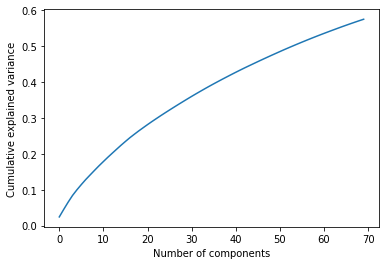

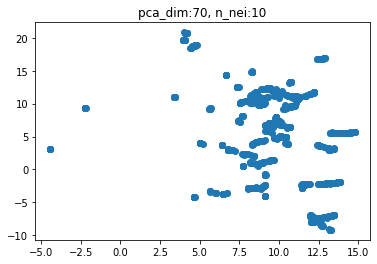

In [101]:
if run_clustering:

  embed_param_dict = embed_param_dict= {'pca_dim': 70,
                    'n_neighbors': 10,
                    'min_dist': 0.0,
                    'n_components': 2,
                    'metric': 'cosine',
                    'random_state': 123}

  embed_param_title = "pca_dim:" + str(embed_param_dict['pca_dim']) + ', n_nei:' + str(embed_param_dict['n_neighbors'])

  lower_embed = ec.project_original_embedding(count_vect_df, 
                                              embed_param_dict, 
                                              to_low = True, 
                                              mid_to_low_method='umap',
                                              title=embed_param_title)


  lower_embed.shape   


### Clustering

You have selected agglomerative for clustering.
Clustering completed.


<Figure size 432x288 with 0 Axes>

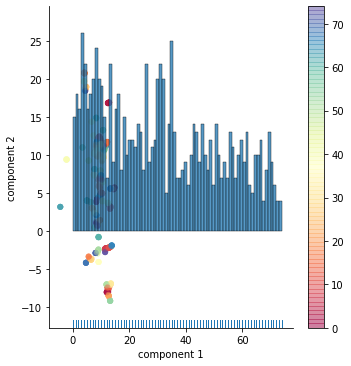

[15 52 53  2 13 10  8 60 62 67  2 35 35 25 14 23 65 26  3  7 26 45 45 45
 45 49 45 45 13  9 70 51 51 44 44 44 44 44 48  7 40 40 60 34 34  5 10 61
  7 34 70 10 17 54 54 65  7 47 74 36 24 15 15 12 31  4 45 45 70  9  3 37
  3  3  6 23  0 18 11 38 38 38 11 11 67 44 26 38 38 11 46 49  0 16 59 52
 47 23 65  1  4  4 31 46 11 20  3 26 56 27 47 49 59 51 51 10 67 20 19 16
 56 42  0 16  3 38  8  8 14 20 14  1  5 32 10  2 52 27  5 53  8  8  7  5
 11 13  2  2 32 54 64 31 31 59 45 34  7 21  1  1 15 15 43 43 46 30 30 43
 20 43 43 43 72 43 36 70 73 16  5  5 24 31  8  3  3  3  3  3 12 63  9 29
 72 47 40 29 60 60 34 66 23 23 23 63  7 13  4  8 53 53 19  9 56 30 30 18
 18 52 46 11 11 11 11 35 39 39 39 39 37 22 71  9 28  3  3 46  3  7 52  3
  4 68 35 66 30  0 16 22  7 60 61 20 20  7 20 10 31 24 36 27 49 34 36 25
 36 25 49 49 36 41 20 36  1 63 46 13  2 51 24 24 49  7 52 62  5  5 65  5
 65  7 14  5 18  1 56 66 29 54 54 55 12  6 57  6 40 26 21 10 31 26 26 26
 26 44  6  3 26 57  0 47 15 23  5 46 23 34 55 55 55

In [104]:
if run_clustering:

  # print("Currently clustering item:", item)
  ## For hdbscan: specify min_cluster_size, min_samples, alpha
  ## for agglomerative specify: n_clusters, linkage
  ## for kmeans specify: num_clusters
  cluster_param_dict = {'min_cluster_size': 4, # hdbscan options
                        'min_samples': 1,
                        'cluster_selection_epsilon': 0.1,
                        'alpha': 1.0,
                        'metric': 'euclidean',
                        'agg_type': "threshold", # agglomerative options - can be "threshold"or "n_cluster"
                        'n_clusters': 60,
                        'threshold_val': 1.25,
                        'affinity': 'euclidean',
                        'linkage': 'ward',
                        'num_clusters': 30}

  # version to use the lower-dimensional embedding for the clustering     
  cluster_res = ec.cluster_embedding(data=lower_embed, original_corpus_list=title_list, 
                    model='agglomerative', param_dict=cluster_param_dict, plot_option=True)




  all_cluster_labels = cluster_res.labels_


  #ai_sentence_df['cluster_label'] = all_cluster_labels

  # if using a subset of the data
  job_task_clusters['task_rep_cluster_label'] = all_cluster_labels

  print(job_task_clusters.shape)
  print(job_task_clusters.columns)

In [106]:
job_task_clusters.sort_values(by='task_rep_cluster_label')

,Title,task_cluster_label,str_clusters,job_eng_flag_sums,job_eng_flag_normed_sums,job_cluster,task_rep_cluster_label
92,"Bookkeeping, Accounting, and Auditing Clerks","[311, 267, 420, 309, 10, 500, 399, 135, 23, 31...","311, 267, 420, 309, 10, 500, 399, 135, 23, 311...",39,0.902719,18,0
755,Retail Salespersons,"[372, 611, 399, 128, 367, 183, 314, 611, 390, ...","372, 611, 399, 128, 367, 183, 314, 611, 390, 2...",54,1.109014,23,0
382,Gambling Cage Workers,"[291, 81, 17, 257, 81, 81, 81, 81, 135, 291, 1...","291, 81, 17, 257, 81, 81, 81, 81, 135, 291, 13...",9,0.182936,22,0
122,Cashiers,"[10, 512, 188, 10, 372, 223, 332, 181, 399, 43...","10, 512, 188, 10, 372, 223, 332, 181, 399, 437...",24,0.749691,22,0
776,"Secretaries and Administrative Assistants, Exc...","[437, 478, 224, 550, 23, 428, 407, 52, 363, 46...","437, 478, 224, 550, 23, 428, 407, 52, 363, 464...",25,0.730138,22,0
...,...,...,...,...,...,...,...
809,Soil and Plant Scientists,"[255, 493, 7, 7, 72, 7, 7, 72, 466, 202, 7, 7,...","255, 493, 7, 7, 72, 7, 7, 72, 466, 202, 7, 7, ...",63,1.488057,35,73
824,Speech-Language Pathology Assistants,"[523, 476, 523, 23, 581, 405, 523, 64, 207, 11...","523, 476, 523, 23, 581, 405, 523, 64, 207, 114...",22,0.614952,3,74
823,Speech-Language Pathologists,"[394, 523, 196, 300, 523, 23, 523, 482, 523, 9...","394, 523, 196, 300, 523, 23, 523, 482, 523, 99...",6,0.105514,3,74
58,Audiologists,"[271, 523, 482, 523, 198, 3, 523, 424, 523, 54...","271, 523, 482, 523, 198, 3, 523, 424, 523, 543...",7,0.102920,3,74


In [107]:
job_task_clusters[job_task_clusters['Title'].str.contains("Engineer")].sort_values(by='task_rep_cluster_label')

,Title,task_cluster_label,str_clusters,job_eng_flag_sums,job_eng_flag_normed_sums,job_cluster,task_rep_cluster_label
880,Transportation Engineers,"[59, 375, 1, 6, 200, 375, 339, 2, 200, 149, 46...","59, 375, 1, 6, 200, 375, 339, 2, 200, 149, 463...",280,7.909473,50,4
502,Locomotive Engineers,"[371, 371, 472, 264, 251, 626, 472, 327, 366, ...","371, 371, 472, 264, 251, 626, 472, 327, 366, 6...",88,3.165748,50,4
728,"Rail Yard Engineers, Dinkey Operators, and Hos...","[122, 35, 607, 626, 274, 626, 244, 66, 472, 62...","122, 35, 607, 626, 274, 626, 244, 66, 472, 626...",117,3.922034,50,4
138,Civil Engineers,"[82, 149, 149, 609, 2, 44, 404, 149, 200, 614,...","82, 149, 149, 609, 2, 44, 404, 149, 200, 614, ...",155,4.916184,31,5
287,Environmental Engineers,"[180, 614, 202, 82, 82, 6, 180, 444, 82, 147, ...","180, 614, 202, 82, 82, 6, 180, 444, 82, 147, 6...",198,4.964323,30,5
45,Architectural and Engineering Managers,"[118, 319, 204, 406, 204, 263, 60, 406, 447, 6...","118, 319, 204, 406, 204, 263, 60, 406, 447, 63...",143,5.011482,30,5
522,Manufacturing Engineers,"[14, 396, 34, 34, 44, 34, 416, 14, 222, 500, 3...","14, 396, 34, 34, 44, 34, 416, 14, 222, 500, 34...",263,7.944903,33,5
281,"Engineering Teachers, Postsecondary","[405, 594, 46]","405, 594, 46",3,0.079113,4,7
78,Bioengineers and Biomedical Engineers,"[36, 196, 198, 49, 617, 196, 16, 338, 219, 86,...","36, 196, 198, 49, 617, 196, 16, 338, 219, 86, ...",196,6.436819,25,11
14,Aerospace Engineers,"[262, 14, 477, 503, 84, 14, 508, 477, 60, 5, 4...","262, 14, 477, 503, 84, 14, 508, 477, 60, 5, 45...",151,6.942072,33,14


In [108]:
job_task_clusters.to_csv("job_task_eng_clusters.csv", index=False)

### Cosine Similarity

In [ ]:
# calculate similarity
from scipy.spatial.distance import cdist

In [ ]:
n = 3
threshold = 0.7

In [ ]:
# n = 7




sim_tasks_dict = {'batch_num': [],
                  'job_id':[],
                  'sent_id':[],
                  'original_sent_text':[],
                  'similar_task_id':[],
                  'similarity_rank':[],
                  'similarity_score':[],
                  'similar_task_text':[]}


# for i in np.sort(unlabeled_sent_df['cluster_label'].unique()):
#for i in range(10):

for i in range(10):
  test_df = jobs_df[jobs_df['batch_num'] == i]

  test_df['clean_description'] = test_df['description'].str.replace("\n", ". ")
  
  nlp = spacy.load("en_core_web_lg")
  if i > 0:
    del description_sent_df
    del description_sent_list
  description_sent_df, description_sent_list = sentence_segmenter(test_df, 'clean_description')

  description_sent_df.reset_index(inplace=True)
  description_sent_df = description_sent_df.rename(columns = {'index':'sent_id'})

  print(f"working on batch {i}.")

  # try:
  # print(f"\nWorking on cluster {i}")
  # temp_cl_df = unlabeled_sent_df[unlabeled_sent_df['cluster_label'] == i]

  description_sent_list = description_sent_df.split_sent.to_list()

  if i > 0:
    del description_sent_embeddings
  description_sent_embeddings = ec.embed_raw_text(description_sent_list, 'all-miniLM', max_seq_length=200)

  print(description_sent_embeddings.shape)

  print("Calculating similarity scores")
  cosine_df = 1 - cdist(description_sent_embeddings, task_embeddings, metric='cosine')

  if i > 0:
    del scores_df
  scores_df = pd.DataFrame(cosine_df)

  for j in range(scores_df.shape[0]):
    # top_n_scores = scores_df.iloc[j,:].nlargest(n)
    # indices = top_n_scores.index
    
    #print(top_n_scores)
    # pick scores over threshold
    scores = scores_df.iloc[j,:]
    indices = scores[scores > threshold].index


    
    #print(indices)


    for num, k in enumerate(indices):
      # print(num)
      # print(i)
      # print(f"Item {j} had score {top_n_scores.iloc[num]}. The task was: {tasks_text[j]}")
      # print(f"The original classification of this task was {tasks_df['label'].iloc[j]}")

      #print(f"Cluster label: {temp_cl_df['cluster_label'].iloc[j]}")
      #print(labeled_sent_df['sum_sent'].iloc[k])
      #print(temp_cl_df['split_sent'].iloc[j])

      sim_tasks_dict['batch_num'].append(i)
      sim_tasks_dict['job_id'].append(description_sent_df['job_id'].iloc[j])
      sim_tasks_dict['sent_id'].append(description_sent_df['sent_id'].iloc[j])
      sim_tasks_dict['original_sent_text'].append(description_sent_df['split_sent'].iloc[j])
      # sim_sents_dict['original_cluster_label'].append(temp_cl_df['cluster_label'].iloc[j])
      sim_tasks_dict['similarity_rank'].append(num)
      sim_tasks_dict['similar_task_text'].append(unique_tasks_df['Task'].iloc[k])
      sim_tasks_dict['similar_task_id'].append(unique_tasks_df['Task ID'].iloc[k])
      sim_tasks_dict['similarity_score'].append(scores.iloc[k])
      # sim_sents_dict['similar_sent_label'].append(unique_tasks_df['manual_text_label_v2'].iloc[k]) # may need to make this manual_text_label instead of codebook_v2



  # except:
  #   print(f"Error encountered in batch {i}.")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 entries.
text column length 9073
job id length 9073
split sent length 9073
sent num length 9073
Filtered dataframe for clean_description.
Dataframe has size (9073, 4).
The list has length 9073.
working on batch 0.


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Original model max_seq_length: 128.
New model max_seq_length: 200.
Raw text embedding completed.
Original raw text had dimension: 9073.
The dimension of the embedding is (9073, 384).
(9073, 384)
Calculating similarity scores
finished 0 entries.
text column length 9284
job id length 9284
split sent length 9284
sent num length 9284
Filtered dataframe for clean_description.
Dataframe has size (9284, 4).
The list has length 9284.
working on batch 1.
Original model max_seq_length: 128.
New model max_seq_length: 200.
Raw text embedding completed.
Original raw text had dimension: 9284.
The dimension of the embedding is (9284, 384).
(9284, 384)
Calculating similarity scores
finished 0 entries.
text column length 9163
job id length 9163
split sent length 9163
sent num length 9163
Filtered dataframe for clean_description.
Dataframe has size (9163, 4).
The list has length 9163.
working on batch 2.
Original model max_seq_length: 128.
New model max_seq_length: 200.
Raw text embedding completed.
Ori

In [ ]:
sim_tasks_df = pd.DataFrame(sim_tasks_dict)
sim_tasks_df

,batch_num,job_id,sent_id,original_sent_text,similar_task_id,similarity_rank,similarity_score,similar_task_text
0,0,0,12,Supporting engineers by completing engineering...,22024,0,0.713755,"Assist engineers in developing, building, or t..."
1,0,0,15,"Create Excel, Word, and PowerPoint summaries a...",2771,0,0.705085,"Prepare invoices, reports, memos, letters, fin..."
2,0,0,31,Access to further training and development.,7565,0,0.719498,Identify training and development needs.
3,0,0,31,Access to further training and development.,5592,1,0.704984,Attend training sessions to increase knowledge...
4,0,0,32,Mentoring programs.,21171,0,0.715906,Mentor graduate students and junior colleagues.
...,...,...,...,...,...,...,...,...
36667,9,1999,9882,"Collaborate with development team, including D...",11004,5,0.727104,"Collaborate with engineers, mechanics, and oth..."
36668,9,1999,9884,"Working closely with our Cost Engineer, you wi...",83,0,0.706523,"Confer with engineers, architects, owners, con..."
36669,9,1999,9884,"Working closely with our Cost Engineer, you wi...",21942,1,0.723528,"Prepare cost estimates, contracts, bidding doc..."
36670,9,1999,9884,"Working closely with our Cost Engineer, you wi...",11505,2,0.705029,Confer with customers to determine project req...


In [ ]:
# scores = scores_df.iloc[5,:]
# scores[scores >0.7].index


In [ ]:
threshold = 0.7
most_sim_df = sim_tasks_df[sim_tasks_df['similarity_score'] > threshold]

In [ ]:
most_sim_df

,batch_num,job_id,sent_id,original_sent_text,similar_task_id,similarity_rank,similarity_score,similar_task_text
0,0,0,12,Supporting engineers by completing engineering...,22024,0,0.713755,"Assist engineers in developing, building, or t..."
1,0,0,15,"Create Excel, Word, and PowerPoint summaries a...",2771,0,0.705085,"Prepare invoices, reports, memos, letters, fin..."
2,0,0,31,Access to further training and development.,7565,0,0.719498,Identify training and development needs.
3,0,0,31,Access to further training and development.,5592,1,0.704984,Attend training sessions to increase knowledge...
4,0,0,32,Mentoring programs.,21171,0,0.715906,Mentor graduate students and junior colleagues.
...,...,...,...,...,...,...,...,...
36667,9,1999,9882,"Collaborate with development team, including D...",11004,5,0.727104,"Collaborate with engineers, mechanics, and oth..."
36668,9,1999,9884,"Working closely with our Cost Engineer, you wi...",83,0,0.706523,"Confer with engineers, architects, owners, con..."
36669,9,1999,9884,"Working closely with our Cost Engineer, you wi...",21942,1,0.723528,"Prepare cost estimates, contracts, bidding doc..."
36670,9,1999,9884,"Working closely with our Cost Engineer, you wi...",11505,2,0.705029,Confer with customers to determine project req...


In [ ]:
most_sim_df = pd.merge(most_sim_df, unique_tasks_df, how="left", left_on="similar_task_text", right_on="Task")

In [ ]:
most_sim_df

,batch_num,job_id,sent_id_x,original_sent_text,similar_task_id,similarity_rank,similarity_score,similar_task_text,sent_id_y,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source
0,0,0,12,Supporting engineers by completing engineering...,22024,0,0.713755,"Assist engineers in developing, building, or t...",4078,17-3026.00,Industrial Engineering Technologists and Techn...,22024,"Assist engineers in developing, building, or t...",NaN,NaN,11/2020,Analyst
1,0,0,15,"Create Excel, Word, and PowerPoint summaries a...",2771,0,0.705085,"Prepare invoices, reports, memos, letters, fin...",13337,43-6011.00,Executive Secretaries and Executive Administra...,2771,"Prepare invoices, reports, memos, letters, fin...",Core,141.0,07/2017,Incumbent
2,0,0,31,Access to further training and development.,7565,0,0.719498,Identify training and development needs.,4897,19-3032.00,Industrial-Organizational Psychologists,7565,Identify training and development needs.,Core,68.0,07/2012,Incumbent
3,0,0,31,Access to further training and development.,5592,1,0.704984,Attend training sessions to increase knowledge...,5509,21-1011.00,Substance Abuse and Behavioral Disorder Counse...,5592,Attend training sessions to increase knowledge...,Core,54.0,08/2021,Incumbent
4,0,0,32,Mentoring programs.,21171,0,0.715906,Mentor graduate students and junior colleagues.,4571,19-2011.00,Astronomers,21171,Mentor graduate students and junior colleagues.,Core,22.0,08/2020,Occupational Expert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36667,9,1999,9882,"Collaborate with development team, including D...",11004,5,0.727104,"Collaborate with engineers, mechanics, and oth...",7617,27-1013.00,"Fine Artists, Including Painters, Sculptors, a...",11004,"Collaborate with engineers, mechanics, and oth...",Supplemental,49.0,07/2017,Incumbent
36668,9,1999,9884,"Working closely with our Cost Engineer, you wi...",83,0,0.706523,"Confer with engineers, architects, owners, con...",1480,13-1051.00,Cost Estimators,83,"Confer with engineers, architects, owners, con...",Core,22.0,07/2016,Occupational Expert
36669,9,1999,9884,"Working closely with our Cost Engineer, you wi...",21942,1,0.723528,"Prepare cost estimates, contracts, bidding doc...",3886,17-3011.00,Architectural and Civil Drafters,21942,"Prepare cost estimates, contracts, bidding doc...",NaN,NaN,11/2020,Analyst
36670,9,1999,9884,"Working closely with our Cost Engineer, you wi...",11505,2,0.705029,Confer with customers to determine project req...,14219,47-2121.00,Glaziers,11505,Confer with customers to determine project req...,Supplemental,66.0,07/2014,Incumbent


In [ ]:
most_sim_df.to_csv("most_sim_tasks_df_mechanical_batched.csv", index=False)